In [ ]:
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_76696/1251511559.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
def load_dataset():
    X = pd.read_csv('X_train.txt', sep=r'\s+', header=None)
    features = pd.read_csv('features.txt', sep=r'\s+', header=None, usecols=[1])

    X.columns = features.iloc[:, 0].values

    return X

X_train = load_dataset()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print(X_train)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

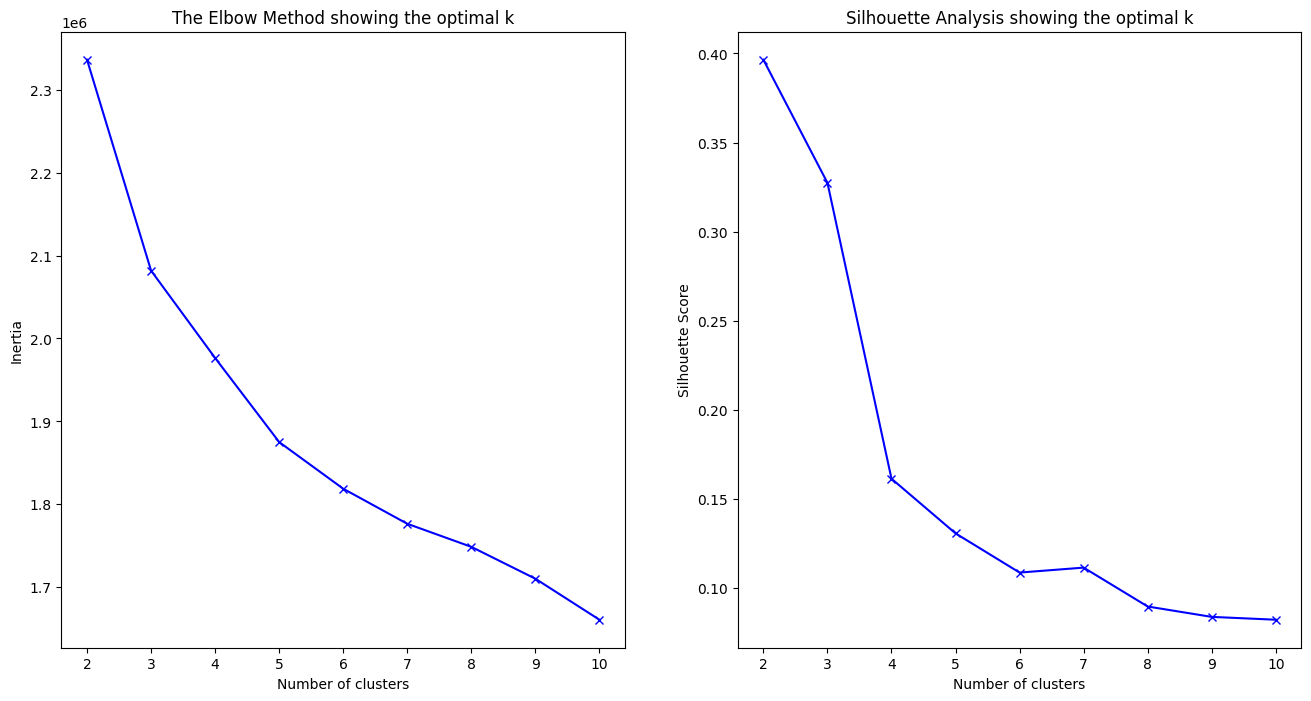

In [ ]:
def find_optimal_clusters(data, max_k=10):
    scores = []
    silhouette_scores = []
    range_values = range(2, max_k+1)

    for i in range_values:
        kmeans = KMeans(n_clusters=i, random_state=42).fit(data)
        scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.plot(range_values, scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')

    plt.subplot(1, 2, 2)
    plt.plot(range_values, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis showing the optimal k')
    plt.show()

find_optimal_clusters(X_train_scaled)

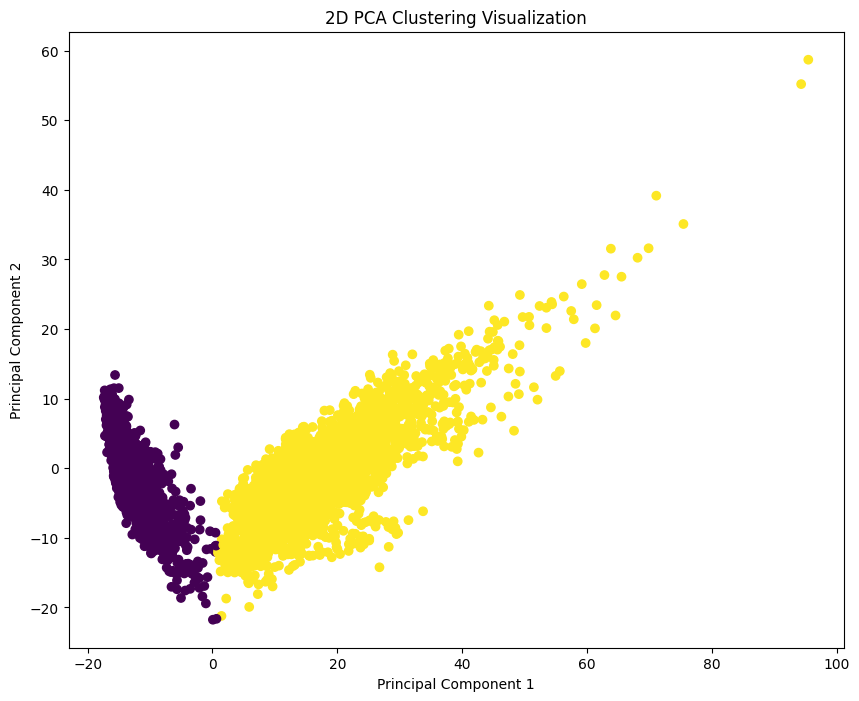

In [ ]:
# Enter the optimal number of clusters
optimal_k = 2

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_pca)

pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
plt.figure(figsize=(10,8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Clustering Visualization')
plt.show()

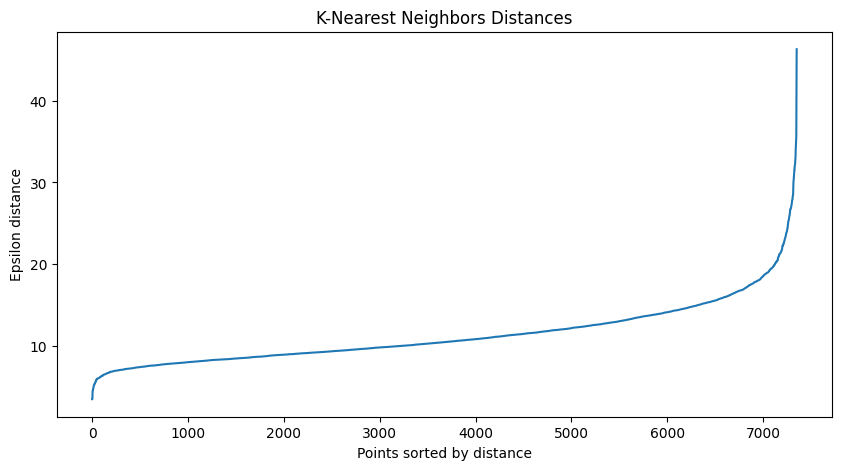

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

min_samples: 1, Clusters: 827, Noise Points: 0, Noise Ratio: 0.00
min_samples: 2, Clusters: 73, Noise Points: 754, Noise Ratio: 0.10
min_samples: 3, Clusters: 18, Noise Points: 864, Noise Ratio: 0.12
min_samples: 4, Clusters: 16, Noise Points: 928, Noise Ratio: 0.13
min_samples: 5, Clusters: 11, Noise Points: 1009, Noise Ratio: 0.14
min_samples: 6, Clusters: 9, Noise Points: 1075, Noise Ratio: 0.15
min_samples: 7, Clusters: 8, Noise Points: 1120, Noise Ratio: 0.15
min_samples: 8, Clusters: 8, Noise Points: 1150, Noise Ratio: 0.16
min_samples: 9, Clusters: 8, Noise Points: 1182, Noise Ratio: 0.16
min_samples: 10, Clusters: 8, Noise Points: 1201, Noise Ratio: 0.16
min_samples: 11, Clusters: 6, Noise Points: 1255, Noise Ratio: 0.17
min_samples: 12, Clusters: 6, Noise Points: 1264, Noise Ratio: 0.17
min_samples: 13, Clusters: 6, Noise Points: 1292, Noise Ratio: 0.18
min_samples: 14, Clusters: 5, Noise Points: 1315, Noise Ratio: 0.18
min_samples: 15, Clusters: 4, Noise Points: 1335, Noise R

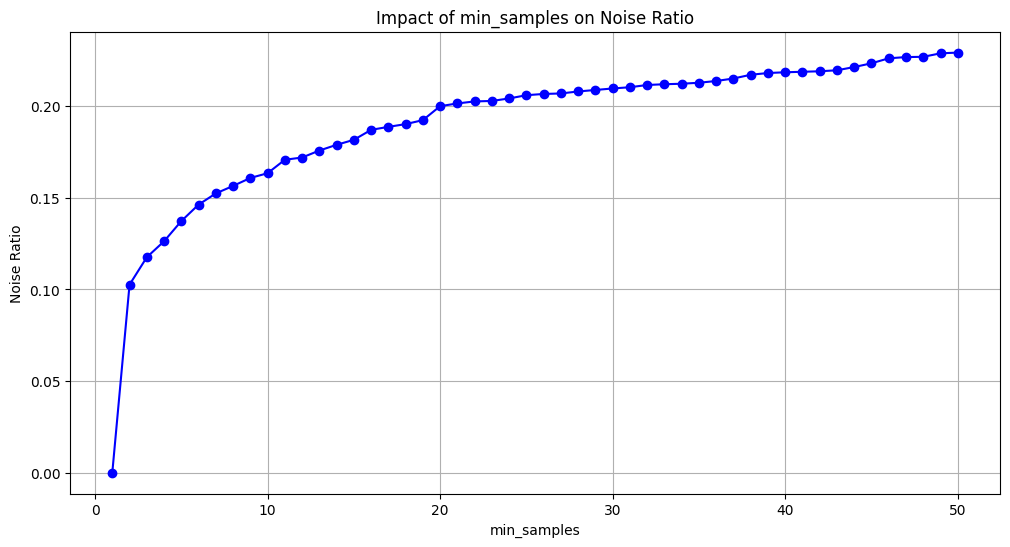

In [ ]:
# Enter optimal epsilon value (taken from the elbow of the graph)
eps_value = 16

min_samples_values = range(1, 50 + 1)

results = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    dbscan.fit(X_train_scaled)

    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(X_train_scaled)

    results.append((min_samples, n_clusters, n_noise, noise_ratio))

for result in results:
    print(f"min_samples: {result[0]}, Clusters: {result[1]}, Noise Points: {result[2]}, Noise Ratio: {result[3]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot([r[0] for r in results], [r[3] for r in results], marker='o', linestyle='-', color='b')
plt.title('Impact of min_samples on Noise Ratio')
plt.xlabel('min_samples')
plt.ylabel('Noise Ratio')
plt.grid(True)
plt.show()

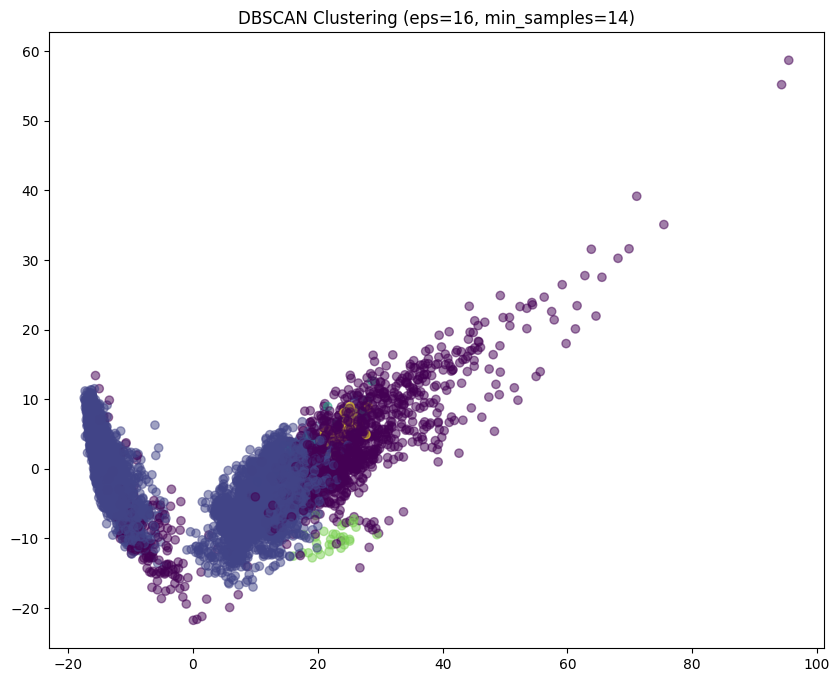

In [ ]:
# Enter optimal min_samples value
min_samples_value = 14

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan.fit(X_train_scaled)

pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
plt.show()


In [ ]:
silhouette_kmeans = silhouette_score(X_train_scaled, kmeans.labels_)
silhouette_dbscan = silhouette_score(X_train_scaled, dbscan.labels_)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}\nSilhouette Score for DBSCAN: {silhouette_dbscan}\n")

ch_kmeans = calinski_harabasz_score(X_train_scaled, kmeans.labels_)
ch_dbscan = calinski_harabasz_score(X_train_scaled, dbscan.labels_)
print(f"Calinski-Harabasz Index for K-Means: {ch_kmeans}\nCalinski-Harabasz Index for DBSCAN: {ch_dbscan}\n")

db_kmeans = davies_bouldin_score(X_train_scaled, kmeans.labels_)
db_dbscan = davies_bouldin_score(X_train_scaled, dbscan.labels_)
print(f"Davies-Bouldin Index for K-Means: {db_kmeans}\nDavies-Bouldin Index for DBSCAN: {db_dbscan}")


Silhouette Score for K-Means: 0.39650058094388707
Silhouette Score for DBSCAN: 0.1306302711866948

Calinski-Harabasz Index for K-Means: 5626.012514543327
Calinski-Harabasz Index for DBSCAN: 407.9506016528641

Davies-Bouldin Index for K-Means: 1.0688348883519019
Davies-Bouldin Index for DBSCAN: 2.0479427616407473
